# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Duta Kukuh Pribadi
- **Email:** dutakupri@gmail.com
- **ID Dicoding:** olober76

## Menentukan Pertanyaan Bisnis

- Dari Semua Kategori produk, Kategori apa yang paling banyak menghasilkan revenue?
- Bagaimana pola Performa Penjualan dan Revenue dalam Beberapa Bulan Terakhir?

## Import Semua Packages/Library yang Digunakan

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [109]:
# disini mencoba untuk mengakses file olist_customer_dataset.csv

customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [110]:
# mengakses file geolocation_dataset.csv untuk mengetahui lokasi state

geoloc_df = pd.read_csv('./data/olist_geolocation_dataset.csv')
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [111]:
# mengakses file order_payments_dataset.csv

order_payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [112]:
# mengakses file order beserta keterangannya di  order_reviews_dataset.csv

orderReviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [113]:
# mengakses file yang telah di order pada orders_dataset.csv

orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [114]:
# mengakses data yang berisi kategori produk pada  product_category_name_translation.csv

product_category_df = pd.read_csv('./data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [115]:
# mengakses id produk products_dataset.csv

products_df = pd.read_csv('./data/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [116]:
# products_df =products_df[['product_id','product_category_name']]
# products_df

In [117]:
# mengakses id seller di  sellers_dataset.csv

sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [118]:
# mengakses file produk yang di pesan beserta sellernya pada order_items_dataset.csv

order_items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

mencari informasi tentang customer_df, termasuk jumlah baris, nama kolom, jumlah non-null nilai dalam setiap kolom, tipe data kolom, dan penggunaan memori.

In [119]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


menghitung jumlah nilai unik (distinct) dalam setiap kolom dari DataFrame.

In [120]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

mengidentifikasi baris-baris yang memiliki nilai yang sama dengan baris lainnya (TIDAK ADA NILAI YANG TERDUPLIKAT)

In [121]:
customers_df.duplicated().sum()

0

mengidentifikasi nilai-nilai yang hilang (missing values) dalam DataFrame (TIDAK ADA NILAI YANG HILANG)

In [122]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

mencari informasi tentang geoloc_df, termasuk jumlah baris, nama kolom, jumlah non-null nilai dalam setiap kolom, tipe data kolom, dan penggunaan memori.

In [123]:
geoloc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


mencari informasi tentang order_items_df, termasuk jumlah baris, nama kolom, jumlah non-null nilai dalam setiap kolom, tipe data kolom, dan penggunaan memori.

In [124]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


mengidentifikasi nilai-nilai yang hilang (missing values) dalam DataFrame (TIDAK ADA NILAI YANG HILANG)

In [126]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

statistik deskriptif untuk setiap kolom numerik dalam DataFrame.

In [127]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


terdapat jumlah duplicat pada order id yang harusnya unique
dan terdapat shipping limit date yang harusnya datetime

In [128]:
order_items_df.duplicated('order_id').sum()

13984

mencari informasi tentang order payment df

In [129]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


terdapat duplikasi pada order id

In [130]:
order_payments_df.duplicated('order_id').sum()

4446

menghitung jumlah nilai unik pada order_payment

In [131]:
order_payments_df['order_id'].nunique()

99440

melihat informasi mengenai orderReviews

In [132]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


terdapat nilai yang hilang pada review comment title dan massage

In [133]:
orderReviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Menghitung nilai unik pada orderReviews

In [134]:
orderReviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

mengecek duplikasi pada review_id dan order_id

In [135]:
print(f'jumlah review_id duplikat:', orderReviews_df.duplicated('review_id').sum())
print(f'jumlah order_id duplikat:', orderReviews_df.duplicated('order_id').sum())

jumlah review_id duplikat: 814
jumlah order_id duplikat: 551



terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp seharusnya tipe data timestamp

In [136]:
orderReviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Melihat informasi umum di orders_df

In [137]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


terdapat kesalahan tipe data pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date seharusnya tipe datanya adalah datetime

In [138]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

melihat informasi umum tentang product_category_df

In [139]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [140]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


terdapat banyak nilai yang hilang

In [141]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [90]:
products_df.nunique()

product_id               32951
product_category_name       73
dtype: int64

Terdapat kesalahan tipe data pada kolom product_name_lenght, product_description_lenght, product_photos_qty yang seharusnya bertipe integer
Terdapat typo pada kolom product_name_lenght, product_description_lenght

In [142]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [143]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [93]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

### Cleaning Data

menghapus semua data duplikat pada kolom order_id pada order_items_df

In [144]:
order_items_df.drop_duplicates(subset='order_id', inplace=True)
print(f'jumlah order_id duplikat:',order_items_df.duplicated('order_id').sum())

jumlah order_id duplikat: 0


In [145]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             98666 non-null  object 
 1   order_item_id        98666 non-null  int64  
 2   product_id           98666 non-null  object 
 3   seller_id            98666 non-null  object 
 4   shipping_limit_date  98666 non-null  object 
 5   price                98666 non-null  float64
 6   freight_value        98666 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [146]:
order_items_df.nunique()

order_id               98666
order_item_id              1
product_id             31881
seller_id               3088
shipping_limit_date    93001
price                   5882
freight_value           6743
dtype: int64

mengubah tipe data shipping_limit_date menjadi datetime

In [147]:
order_items_df['shipping_limit_date'] = order_items_df['shipping_limit_date'].astype('datetime64[ns]')
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             98666 non-null  object        
 1   order_item_id        98666 non-null  int64         
 2   product_id           98666 non-null  object        
 3   seller_id            98666 non-null  object        
 4   shipping_limit_date  98666 non-null  datetime64[ns]
 5   price                98666 non-null  float64       
 6   freight_value        98666 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [148]:
order_items_df['shipping_limit_date'].head()

0   2017-09-19 09:45:35
1   2017-05-03 11:05:13
2   2018-01-18 14:48:30
3   2018-08-15 10:10:18
4   2017-02-13 13:57:51
Name: shipping_limit_date, dtype: datetime64[ns]

menghapus data duplikat yang ada di data order_reviews_df pada kolom review_id dan order_id

In [149]:
orderReviews_df.drop_duplicates(subset='review_id', inplace=True)
print(f'jumlah review_id duplikat:',orderReviews_df.duplicated('review_id').sum())
orderReviews_df.duplicated().sum()

jumlah review_id duplikat: 0


0

In [150]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                98410 non-null  object
 1   order_id                 98410 non-null  object
 2   review_score             98410 non-null  int64 
 3   review_comment_title     11519 non-null  object
 4   review_comment_message   40668 non-null  object
 5   review_creation_date     98410 non-null  object
 6   review_answer_timestamp  98410 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.0+ MB


In [151]:
orderReviews_df.nunique()

review_id                  98410
order_id                   98167
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

mengubah tipe data pada kolom review_creation_date dan review_answer_timestamp menjadi datetime

In [152]:
datetime_columns = ['review_creation_date','review_answer_timestamp']

for column in datetime_columns:
  orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

In [153]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     11519 non-null  object        
 4   review_comment_message   40668 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


mengubah tipe data orders_df pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime

In [154]:
datetime_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


memperbaiki kesalahan tulisan pada kolom product_name_lenght dan product_description_lenght menjadi product_name_length dan product_description_length pada products_df

In [155]:
products_df.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


mengisi missing value dengan nilai mean pada semua kolom kecuali product_id dalam data products_df menggunakan metode fillna

In [156]:
products_df['product_name_length'].fillna(products_df['product_name_length'].mean(), inplace=True)
products_df['product_description_length'].fillna(products_df['product_description_length'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\4172014020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_name_length'].fillna(products_df['product_name_length'].mean(), inplace=True)
C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\4172014020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [157]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_length             0
product_description_length      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

mengisi missing value pada kolom product_category_name dalam products_df dengan metode interpolate

In [158]:
products_df['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', inplace=True)
products_df.isna().sum()

C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\2937250333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', inplace=True)
C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\2937250333.py:1: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products_df['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', 

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

mengubah tipe data kolom product_name_length, product_description_length dan product_photos_qty dalam products_df menjadi tipe data integer

In [159]:
products_df['product_name_length'] = products_df['product_name_length'].astype(int)
products_df['product_description_length'] = products_df['product_description_length'].astype(int)
products_df['product_photos_qty'] = products_df['product_name_length'].astype(int)

products_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  int32  
 3   product_description_length  32951 non-null  int32  
 4   product_photos_qty          32951 non-null  int32  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.9+ MB


Menggabungkan Data


products_df & product_category_df

In [160]:
products2_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='outer',
    left_on='product_category_name',
    right_on='product_category_name'
)

order_items_df & order_payment_df

In [161]:
orders2_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how='outer',
    left_on='order_id',
    right_on='order_id'
)
orders2_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


orders2_df & products2_df

In [162]:
gabungan1_df = pd.merge(
    left=orders2_df,
    right=products2_df,
    how='outer',
    left_on='product_id',
    right_on='product_id'
)
gabungan1_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,f30149f4a8882a08895b6a242aa0d612,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,1.0,credit_card,3.0,120.24,perfumaria,53.0,596.0,53.0,300.0,20.0,16.0,16.0,perfumery
1,f5eda0ded77c1293b04c953138c8331d,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,1.0,credit_card,1.0,143.83,automotivo,56.0,752.0,56.0,1225.0,55.0,10.0,26.0,auto
2,0bf736fd0fd5169d60de3699fcbcf986,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,1.0,credit_card,10.0,242.10,cama_mesa_banho,50.0,266.0,50.0,300.0,45.0,15.0,35.0,bed_bath_table
3,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,1.0,credit_card,4.0,78.50,utilidades_domesticas,25.0,364.0,25.0,550.0,19.0,24.0,12.0,housewares
4,6f0dfb5b5398b271cc6bbd9ee263530e,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,1.0,credit_card,1.0,78.50,utilidades_domesticas,25.0,364.0,25.0,550.0,19.0,24.0,12.0,housewares


In [163]:
gabungan1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104957 entries, 0 to 104956
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   order_item_id                  103057 non-null  float64       
 2   product_id                     104127 non-null  object        
 3   seller_id                      103057 non-null  object        
 4   shipping_limit_date            103057 non-null  datetime64[ns]
 5   price                          103057 non-null  float64       
 6   freight_value                  103057 non-null  float64       
 7   payment_sequential             103886 non-null  float64       
 8   payment_type                   103886 non-null  object        
 9   payment_installments           103886 non-null  float64       
 10  payment_value                  103886 non-null  float64       
 11  

orders_df & customers_df

In [164]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


gabungan1_df & orders_customers_df

In [165]:
all_df = pd.merge(
    left=gabungan1_df,
    right=orders_customers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,f30149f4a8882a08895b6a242aa0d612,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,1.0,credit_card,3.0,...,delivered,2018-05-20 18:45:21,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:56,2018-06-20,cd929c5ecff5fc60e9d808d33702e434,95890.0,teutonia,RS
1,f5eda0ded77c1293b04c953138c8331d,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,1.0,credit_card,1.0,...,delivered,2017-12-12 19:20:28,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:51,2018-01-05,cbbeff6b693e69511cf9d059f4b71036,14403.0,franca,SP
2,0bf736fd0fd5169d60de3699fcbcf986,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,1.0,credit_card,10.0,...,delivered,2017-12-21 16:21:47,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:41,2018-01-16,f51fb63558e88eb3373773d106fa6880,2883.0,sao paulo,SP
3,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,1.0,credit_card,4.0,...,delivered,2018-08-10 13:24:35,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:40,2018-08-27,4e32da06df703a2561f63e75b13f6260,95174.0,farroupilha,RS
4,6f0dfb5b5398b271cc6bbd9ee263530e,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,1.0,credit_card,1.0,...,delivered,2018-08-01 22:00:33,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:52,2018-08-24,7f2dfd48dba158dbf61ba2ea631d93df,93530.0,novo hamburgo,RS


In [166]:
all_df = all_df.dropna(subset='customer_zip_code_prefix')

all_df['customer_zip_code_prefix'] = all_df['customer_zip_code_prefix'].astype(int)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103887 entries, 0 to 104956
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   order_item_id                  103057 non-null  float64       
 2   product_id                     103057 non-null  object        
 3   seller_id                      103057 non-null  object        
 4   shipping_limit_date            103057 non-null  datetime64[ns]
 5   price                          103057 non-null  float64       
 6   freight_value                  103057 non-null  float64       
 7   payment_sequential             103886 non-null  float64       
 8   payment_type                   103886 non-null  object        
 9   payment_installments           103886 non-null  float64       
 10  payment_value                  103886 non-null  float64       
 11  produ

In [167]:
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,f30149f4a8882a08895b6a242aa0d612,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,1.0,credit_card,3.0,...,delivered,2018-05-20 18:45:21,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:56,2018-06-20,cd929c5ecff5fc60e9d808d33702e434,95890,teutonia,RS
1,f5eda0ded77c1293b04c953138c8331d,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,1.0,credit_card,1.0,...,delivered,2017-12-12 19:20:28,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:51,2018-01-05,cbbeff6b693e69511cf9d059f4b71036,14403,franca,SP
2,0bf736fd0fd5169d60de3699fcbcf986,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,1.0,credit_card,10.0,...,delivered,2017-12-21 16:21:47,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:41,2018-01-16,f51fb63558e88eb3373773d106fa6880,2883,sao paulo,SP
3,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,1.0,credit_card,4.0,...,delivered,2018-08-10 13:24:35,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:40,2018-08-27,4e32da06df703a2561f63e75b13f6260,95174,farroupilha,RS
4,6f0dfb5b5398b271cc6bbd9ee263530e,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,1.0,credit_card,1.0,...,delivered,2018-08-01 22:00:33,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:52,2018-08-24,7f2dfd48dba158dbf61ba2ea631d93df,93530,novo hamburgo,RS


## Exploratory Data Analysis (EDA)

### Explore orders_customers_df

menghapus data order yang tidak ada data order_delivered_customer_date

In [168]:
orders_customers_df.dropna(axis=0, inplace=True)
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99439
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   customer_unique_id             96461 non-null  object        
 9   customer_zip_code_prefix       96461 non-null  int64         
 10  customer_city                  96461 non-null  object        
 11  customer_state      

membuat kolom delivery_time

In [169]:
delivery_time = orders_customers_df["order_delivered_customer_date"] - orders_customers_df["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_customers_df["delivery_time"] = round(delivery_time/60)


orders_customers_df['delivery_time'].describe()

count     96461.000000
mean      17467.105462
std       13703.078631
min      -10065.000000
25%        9086.000000
50%       14187.000000
75%       21803.000000
max      300241.000000
Name: delivery_time, dtype: float64

In [170]:
orders_customers_df = orders_customers_df.drop(orders_customers_df[orders_customers_df['delivery_time'] < 1].index)

orders_customers_df['delivery_time'].describe()

count     96400.000000
mean      17479.641058
std       13698.195225
min          11.000000
25%        9093.000000
50%       14194.500000
75%       21809.000000
max      300241.000000
Name: delivery_time, dtype: float64

In [171]:
orders_customers_df.sort_values(by='delivery_time', ascending=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time
70435,9bccdd3552c2a68af6d166dfd82be6ba,b4e1d5fdf13905222b7a571b9edad9ef,delivered,2018-04-21 13:03:33,2018-04-24 18:05:57,2018-04-23 18:16:54,2018-04-24 18:16:59,2018-05-08,9eb5dbe2b5f217e8a10c5b7e14b90346,8290,sao paulo,SP,11.0
24361,26449e55a87a5c565d60238999c380ff,3ebd7c64f990c7558321fb5af7a547b9,delivered,2018-04-22 18:05:20,2018-04-24 18:55:14,2018-04-23 10:42:46,2018-04-24 19:11:46,2018-05-04,67e01e8409e5b0735a24e54759195613,12307,jacarei,SP,17.0
59204,1378f9601350615613cc8832d6789c5d,988126b4ddf725d9724e4318872ea2ae,delivered,2017-09-01 20:28:02,2017-09-13 22:03:51,2017-09-04 18:07:55,2017-09-13 22:24:46,2017-09-29,507dc9becd4fc65635d90682dfa9d3a3,98900,santa rosa,RS,21.0
22711,fe857b5ac310b06adabd0e18af932cc5,3a5e6f873f45644fdfea652076839de0,delivered,2018-04-22 23:12:46,2018-04-24 18:53:22,2018-04-23 18:37:43,2018-04-24 19:17:28,2018-05-10,a853fbe4c65c24952022a30655adb74f,18090,sorocaba,SP,24.0
44815,339063a819f93e6e25102c3bb66ab667,73e1e70b645c6ef82dda64348a5c2391,delivered,2018-04-20 13:46:38,2018-04-24 19:18:43,2018-04-23 19:26:40,2018-04-24 19:51:47,2018-05-09,b88d7e07a1508ee88d1ca350f201a2a1,8596,itaquaquecetuba,SP,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46543,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,f0785d41d416fa827f24c4b95d066b69,66813,belem,PA,280201.0
60971,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,280272.0
13005,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,c6c0b794d3e4eb69cd85d1438a0db26e,64023,teresina,PI,280584.0
82210,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,eb21169c3153a2b507fc7e76d561ff14,22723,rio de janeiro,RJ,300008.0


In [172]:
orders_customers_df["delivery_time"] = round(delivery_time/86400)

orders_customers_df['delivery_time'].describe()

count    96400.000000
mean        12.128122
std          9.516826
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

In [173]:
orders_customers_df.sort_values(by='delivery_time', ascending=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time
50368,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15,0e764fc1a13e47e900c3d59a989753e8,36045,juiz de fora,MG,0.0
35264,12582224cebac18145db6690144db314,5b2753ef501369b29a72df5ea1b68139,delivered,2018-07-30 14:57:33,2018-08-01 16:31:30,2018-07-31 19:02:00,2018-08-01 23:12:46,2018-08-08,4bf6a57b3515187009d7e1a803781833,5043,sao paulo,SP,0.0
31591,4895f8a5926847fbac7dd72661f60dd0,517fb4c38b2c35fd7c5b4eb8e8a37251,delivered,2018-07-30 16:39:18,2018-08-01 16:31:37,2018-07-31 14:05:00,2018-08-02 00:28:44,2018-08-08,5aa47e4947fad63e026efcf382737b7f,13348,indaiatuba,SP,0.0
70435,9bccdd3552c2a68af6d166dfd82be6ba,b4e1d5fdf13905222b7a571b9edad9ef,delivered,2018-04-21 13:03:33,2018-04-24 18:05:57,2018-04-23 18:16:54,2018-04-24 18:16:59,2018-05-08,9eb5dbe2b5f217e8a10c5b7e14b90346,8290,sao paulo,SP,0.0
46273,44ac5be3803a136ad51df67f789a2dab,777383b5753753a9c3fbe33e966567e7,delivered,2018-04-20 09:01:16,2018-04-24 18:35:57,2018-04-24 01:17:50,2018-04-25 01:30:59,2018-05-07,1811fa86febfd40fa2b58186732468f4,6230,osasco,SP,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13005,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,c6c0b794d3e4eb69cd85d1438a0db26e,64023,teresina,PI,195.0
60971,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,195.0
46543,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,f0785d41d416fa827f24c4b95d066b69,66813,belem,PA,195.0
82210,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,eb21169c3153a2b507fc7e76d561ff14,22723,rio de janeiro,RJ,208.0


In [174]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96400 entries, 0 to 99439
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96400 non-null  object        
 1   customer_id                    96400 non-null  object        
 2   order_status                   96400 non-null  object        
 3   order_purchase_timestamp       96400 non-null  datetime64[ns]
 4   order_approved_at              96400 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96400 non-null  datetime64[ns]
 6   order_delivered_customer_date  96400 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96400 non-null  datetime64[ns]
 8   customer_unique_id             96400 non-null  object        
 9   customer_zip_code_prefix       96400 non-null  int64         
 10  customer_city                  96400 non-null  object        
 11  customer_state      

In [175]:
orders_customers_df = orders_customers_df.dropna(subset=['delivery_time'])
orders_customers_df['delivery_time'] = orders_customers_df['delivery_time'].astype(int)

orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96400 entries, 0 to 99439
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96400 non-null  object        
 1   customer_id                    96400 non-null  object        
 2   order_status                   96400 non-null  object        
 3   order_purchase_timestamp       96400 non-null  datetime64[ns]
 4   order_approved_at              96400 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96400 non-null  datetime64[ns]
 6   order_delivered_customer_date  96400 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96400 non-null  datetime64[ns]
 8   customer_unique_id             96400 non-null  object        
 9   customer_zip_code_prefix       96400 non-null  int64         
 10  customer_city                  96400 non-null  object        
 11  customer_state      

In [176]:
orders_customers_df.groupby(by='customer_city').customer_id.nunique().reset_index().sort_values(by='customer_id', ascending=False)

,customer_city,customer_id
3563,sao paulo,15019
3126,rio de janeiro,6602
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1486
...,...,...
2923,ponto novo,1
2921,ponto do marambaia,1
2920,ponto belo,1
2919,pontes gestal,1


In [177]:
orders_customers_df.groupby(by='customer_state').customer_id.nunique().reset_index().sort_values(by='customer_id', ascending=False).head(5)

,customer_state,customer_id
25,SP,40436
18,RJ,12349
10,MG,11350
22,RS,5342
17,PR,4920


### Explore gabungan1_df

In [178]:
revenue_bycategory_df = gabungan1_df.groupby(by='product_category_name_english').agg({
    'payment_value':['sum','min','max','mean'],
    'order_item_id':'sum'
})
revenue_bycategory_df.rename(columns={
    'payment_value':'revenue',
    'order_item_id':'quantity'
}, inplace=True)
revenue_bycategory_df.sort_values(by=[('revenue', 'mean')], ascending=False).head(10)

revenue                   \
                                             sum    min       max   
product_category_name_english                                       
computers                              231394.32  50.00   6922.21   
small_appliances_home_oven_and_coffee   52526.66  18.06   2960.05   
home_appliances_2                      124298.64   5.56   2455.12   
agro_industry_and_commerce              78844.99   2.35   6081.54   
small_appliances                       206909.75   0.27   4950.34   
musical_instruments                    212539.00   1.79   4513.32   
fixed_telephony                         65088.76   3.49  13664.08   
construction_tools_safety               43808.42  24.69   3155.82   
office_furniture                       342622.67   1.67   2234.66   
furniture_bedroom                       25404.35   8.48   1535.22   

                                                   quantity  
                                              mean      sum  
product_category_name_english                                
computers                              1180.583265    196.0  
small_appliances_home_oven_and_coffee   509.967573    103.0  
home_appliances_2                       467.288120    266.0  
agro_industry_and_commerce              365.023102    216.0  
small_appliances                        314.452508    658.0  
musical_instruments                     303.627143    700.0  
fixed_telephony                         282.994609    230.0  
construction_tools_safety               260.764405    168.0  
office_furniture                        256.454094   1336.0  
furniture_bedroom                       239.663679    106.0

In [179]:
price_bycategory_df = gabungan1_df.groupby(by='product_category_name_english').agg({
    'price':['min','max','mean']
})
price_bycategory_df.sort_values(by=[('price','mean')], ascending=False)

price                      
                                         min      max         mean
product_category_name_english                                     
computers                              34.50  6729.00  1143.942143
small_appliances_home_oven_and_coffee  10.19  2899.00   484.770874
home_appliances_2                      13.90  2350.00   463.862782
agro_industry_and_commerce             10.50  2990.00   329.533148
small_appliances                        6.50  4799.00   294.984909
...                                      ...      ...          ...
drinks                                  6.00   623.00    58.097833
cds_dvds_musicals                      45.00    65.00    53.333333
diapers_and_hygiene                    25.00   139.89    46.466296
flowers                                15.60    65.90    33.204828
home_comfort_2                         12.90   219.99    29.129130

[71 rows x 3 columns]

In [180]:
gabungan1_df.groupby(by='product_category_name_english').agg({
    'product_id':'nunique'
}).sort_values(by='product_id', ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3087
sports_leisure,2916
furniture_decor,2719
health_beauty,2490
housewares,2381
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


### Explore all_df

In [181]:
revenue_bycity_df = all_df.groupby('customer_city').agg({
    'payment_value':['sum','min','max','mean']
})
revenue_bycity_df.rename(columns={
    'payment_value':'revenue'
})

revenue                               
                         sum      min      max         mean
customer_city                                              
abadia dos dourados   413.50    58.28   219.63   137.833333
abadiania            1025.52  1025.52  1025.52  1025.520000
abaete               1946.81    50.27   466.89   162.234167
abaetetuba           4672.27    31.94  1537.04   389.355833
abaiara               332.15   131.70   200.45   166.075000
...                      ...      ...      ...          ...
xinguara             1608.51    57.28   608.67   178.723333
xique-xique           230.56    48.69   124.09    76.853333
zacarias              229.85    68.41   161.44   114.925000
ze doca               878.92    66.51   408.04   175.784000
zortea                137.57    46.69    90.88    68.785000

[4119 rows x 4 columns]

In [182]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
    'payment_value':'sum'
})

payment_value
customer_state product_category_name_english               
AC             arts_and_craftmanship                  77.20
               auto                                  661.91
               baby                                  871.97
               bed_bath_table                        909.98
               books_general_interest                757.51
...                                                     ...
TO             sports_leisure                       6454.31
               stationery                            403.38
               telephony                            1895.46
               toys                                 2288.11
               watches_gifts                        6812.98

[1362 rows x 1 columns]

In [183]:
top_category_bystate_df = all_df.groupby(by=['customer_state','product_category_name_english']).agg({
    'payment_value':'sum'
})
top_category_bystate_df.rename(columns={
    'payment_value':'revenue'
}, inplace=True)

idx = top_category_bystate_df.groupby('customer_state')['revenue'].idxmax()

top_category_bystate_df.loc[idx].sort_values(by='revenue', ascending=False)

,,revenue
customer_state,product_category_name_english,
SP,bed_bath_table,559957.34
RJ,watches_gifts,199359.27
MG,health_beauty,179378.47
RS,bed_bath_table,72797.61
PR,sports_leisure,67611.94
BA,health_beauty,62066.01
SC,sports_leisure,51672.30
PE,health_beauty,50202.97
CE,health_beauty,38233.71


## RFM Analysis

In [ ]:
#Building the merged dataset

data = customers_df.copy()
data = pd.merge(data, orders_df, on='customer_id')
data = pd.merge(data, order_items_df, on='order_id')
data = pd.merge(data, order_payments_df, on='order_id')
data = pd.merge(data, products_df, on='product_id')

data.describe(include='object').T

,count,unique,top,freq
customer_id,103056,98665,9af2372a1e49340278e7c1ef8d749f34,29
customer_unique_id,103056,95419,9a736b248f67d166d2fbb006bcb877c3,33
customer_city,103056,4110,sao paulo,16073
customer_state,103056,27,SP,43224
order_id,103056,98665,fa65dad1b0e818e3ccc5cb0e39231352,29
order_status,103056,7,delivered,100756
product_id,103056,31881,99a4788cb24856965c36a24e339b6058,472
seller_id,103056,3088,6560211a19b47992c3666cc44a7e94c0,1928
payment_type,103056,4,credit_card,76278
product_category_name,101555,73,cama_mesa_banho,9899


In [ ]:
#Basic data cleaning by dropping any rows with NaN or Blanks
data.dropna(inplace=True)

data.describe(include='object').T

,count,unique,top,freq
customer_id,99300,95102,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
customer_unique_id,99300,92057,9a736b248f67d166d2fbb006bcb877c3,33
customer_city,99300,4072,sao paulo,15446
customer_state,99300,27,SP,41698
order_id,99300,95102,ccf804e764ed5650cd8759557269dc13,26
order_status,99300,2,delivered,99294
product_id,99300,30589,99a4788cb24856965c36a24e339b6058,460
seller_id,99300,2901,6560211a19b47992c3666cc44a7e94c0,1893
payment_type,99300,4,credit_card,73529
product_category_name,99300,73,cama_mesa_banho,9743


analisis rentang waktu pembelian

In [ ]:

data['order_purchase_timestamp']=pd.to_datetime(data['order_purchase_timestamp'], format= '%Y-%m-%d %H:%M:%S')
min_date=min(data['order_purchase_timestamp'])
max_date = max(data['order_purchase_timestamp'])

In [ ]:
display("Max Date: "+str(max_date))
display("Min Date: "+str(min_date))
display("Total Dur Days: " +str((max_date-min_date).days))
display("Total Dur Weeks: " +str(round((max_date-min_date).days/7,1)))
display("Total Dur Mths: " +str(round((max_date-min_date).days/30.417,1)))

'Max Date: 2018-08-29 15:00:37'

'Min Date: 2016-10-03 09:44:50'

'Total Dur Days: 695'

'Total Dur Weeks: 99.3'

'Total Dur Mths: 22.8'

### Building the RFM Matrics

count    92057.000000
mean       236.792672
std        152.595850
min          0.000000
25%        113.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency In Days, dtype: float64

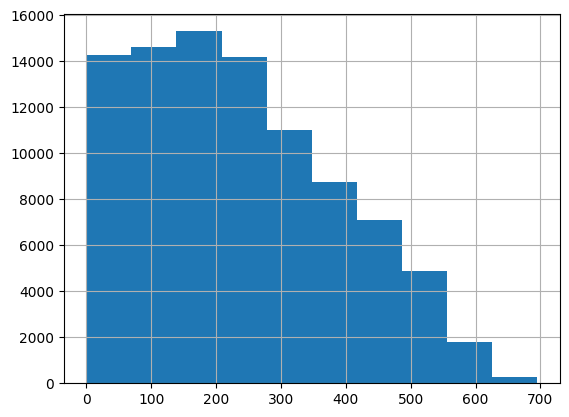

In [ ]:
#group items by unique customers and find the latest (most recent) order date
recency_df = data.groupby(by = 'customer_unique_id', as_index = False)['order_purchase_timestamp'].max()

recency_df["recency"]=max_date-recency_df['order_purchase_timestamp']

#rounding so it is to the nearest number of days
recency_df["recency"]=recency_df["recency"].dt.round("d")

recency_df.rename(columns = {'order_purchase_timestamp':'Most Recent Order Date', "recency":"Recency In Days"}, inplace = True)

#Converting this into a float figure or else the Histogram will not work with time delta data types
recency_df['Recency In Days'] = recency_df['Recency In Days'] / pd.to_timedelta(1, unit='D')

recency_df['Recency In Days'].hist()
recency_df['Recency In Days'].describe()

melihat distribusi frekuensi pembelian untuk setiap pelanggan (berdasarkan 'customer_unique_id')

count    92057.000000
mean         1.033077
std          0.206837
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: Frequency, dtype: float64

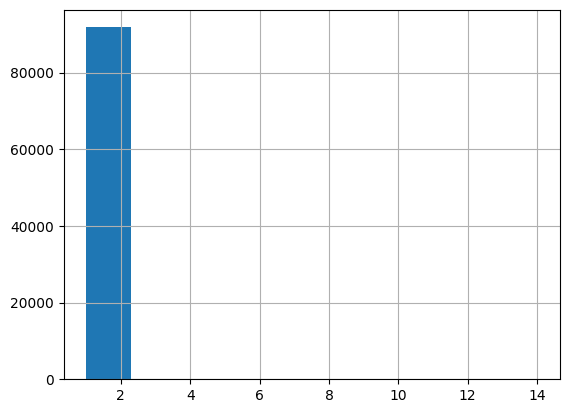

In [ ]:
frequency_df = data.groupby(["customer_unique_id"]).agg({"order_id": "nunique"}).reset_index()
frequency_df.sort_values('order_id', ascending=[False])
frequency_df.rename(columns = {'order_id':'Frequency'}, inplace = True)
frequency_df['Frequency'].hist()
frequency_df['Frequency'].describe()

In [ ]:
#menghitung jumlah kemunculan setiap nilai dalam kolom 'Frequency' 
frequency_df['Frequency'].value_counts()

Frequency
1     89318
2      2518
3       175
4        29
5         9
6         3
7         3
9         1
14        1
Name: count, dtype: int64

melihat distribusi nilai moneter dari pembelian untuk setiap pelanggan (berdasarkan 'customer_unique_id') 

,Monetary Value
count,92057.000000
mean,165.355633
std,226.265147
min,9.590000
25%,63.100000
50%,107.780000
75%,183.030000
max,13664.080000


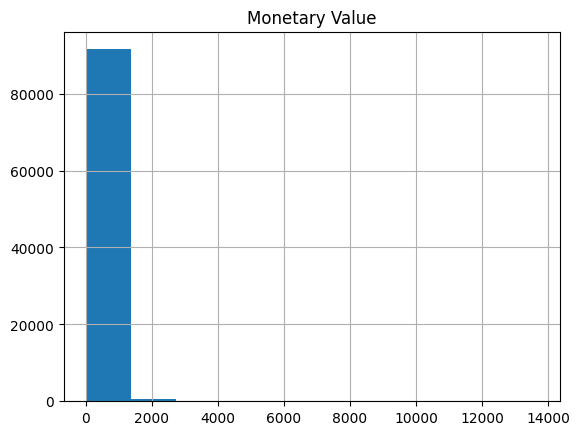

In [ ]:
monetary_df = data.groupby('customer_unique_id', as_index = False)['payment_value'].sum()
monetary_df.rename(columns = {'payment_value':'Monetary Value'}, inplace = True)
monetary_df.hist()
monetary_df.describe()

In [ ]:
#menghitung nilai kuantil ke-99%, yang merupakan nilai di bawah mana 99% dari data berada.
monetary_df['Monetary Value'].quantile(0.99)

1095.9844000000019

<Axes: >

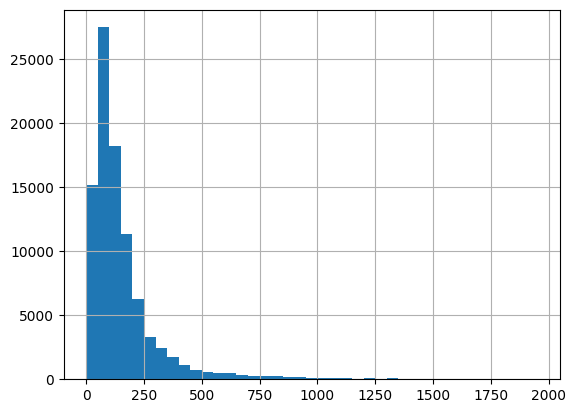

In [ ]:
#visualisasi yang menunjukkan distribusi nilai moneter dari pembelian pelanggan, 
# dengan sumbu x mewakili rentang nilai moneter dan sumbu y mewakili frekuensi 
# kemunculan nilai moneter pada rentang tersebut
monetary_df['Monetary Value'].hist(bins = range(0,2000,50))

<Axes: >

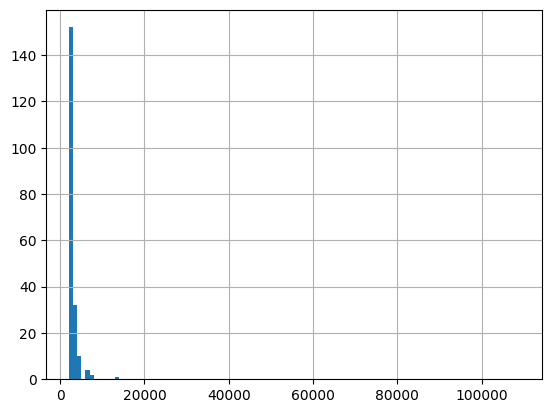

In [ ]:
monetary_df['Monetary Value'].hist(bins = range(2000,110000,1000))

In [ ]:
RFM = frequency_df.copy()
RFM = pd.merge(RFM, recency_df, on='customer_unique_id')
RFM = pd.merge(RFM, monetary_df, on='customer_unique_id')

#Rearranging the columns for readability
RFM=RFM[['customer_unique_id','Recency In Days','Most Recent Order Date','Frequency',"Monetary Value"]]

print(RFM.describe())
RFM.sort_values('Frequency',ascending=[False])

       Recency In Days         Most Recent Order Date     Frequency  \
count     92057.000000                          92057  92057.000000   
mean        236.792672  2018-01-04 21:14:23.155371520      1.033077   
min           0.000000            2016-10-03 16:56:50      1.000000   
25%         113.000000            2017-09-18 14:23:11      1.000000   
50%         218.000000            2018-01-23 21:08:19      1.000000   
75%         345.000000            2018-05-08 10:44:15      1.000000   
max         695.000000            2018-08-29 15:00:37     14.000000   
std         152.595850                            NaN      0.206837   

       Monetary Value  
count    92057.000000  
mean       165.355633  
min          9.590000  
25%         63.100000  
50%        107.780000  
75%        183.030000  
max      13664.080000  
std        226.265147  


,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value
50726,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38
22469,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1172.66
9923,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,959.01
72906,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,1122.72
36199,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,758.83
...,...,...,...,...,...
31122,5650c85bcdef051d8bc16e0771747686,261.0,2017-12-11 17:06:48,1,69.73
31121,5650bf668868651d51740cd49908814e,56.0,2018-07-04 17:45:49,1,14.29
31120,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89
31119,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27


### Adding A Few Additional Features To RFM - Age , Ave Time Between Orders and Ave Monetary Value Per Order

                 Earliest Order Date   Age In Days
count                          92057  92057.000000
mean   2018-01-02 06:25:20.630924544    239.410213
min              2016-10-03 09:44:50      0.000000
25%              2017-09-14 07:17:19    115.000000
50%              2018-01-21 11:46:11    220.000000
75%              2018-05-06 16:30:40    349.000000
max              2018-08-29 15:00:37    695.000000
std                              NaN    153.106578


<Axes: >

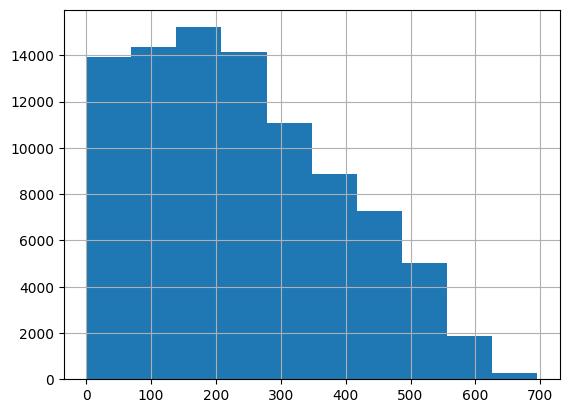

In [ ]:
earliest_order_date=pd.DataFrame(data.groupby(['customer_unique_id'])['order_purchase_timestamp'].min())
earliest_order_date.rename(columns = {'order_purchase_timestamp':'Earliest Order Date'}, inplace = True)
earliest_order_date["Age"]=(max_date-earliest_order_date["Earliest Order Date"]).dt.round("d")
earliest_order_date['Age In Days'] = earliest_order_date['Age'] / pd.to_timedelta(1, unit='D')
earliest_order_date.drop(['Age'], axis=1, inplace=True)
print(earliest_order_date.describe())
earliest_order_date["Age In Days"].hist()

In [ ]:
earliest_order_date

,Earliest Order Date,Age In Days
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111.0
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114.0
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537.0
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321.0
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288.0
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447.0
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262.0
ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568.0


In [ ]:
RFM

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,537.0,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288.0,2017-11-14 19:45:42,1,196.89
...,...,...,...,...,...
92052,fffcf5a5ff07b0908bd4e2dbc735a684,447.0,2017-06-08 21:00:36,1,2067.42
92053,fffea47cd6d3cc0a88bd621562a9d061,262.0,2017-12-10 20:07:56,1,84.58
92054,ffff371b4d645b6ecea244b27531430a,568.0,2017-02-07 15:49:16,1,112.46
92055,ffff5962728ec6157033ef9805bacc48,119.0,2018-05-02 15:17:41,1,133.69


In [ ]:
#Merge the "Age" data with the RFM data
RFM = pd.merge(RFM, earliest_order_date, on='customer_unique_id')

#Calculate the Average Time Between Orders and Average Monetary Value Per Order
RFM["Average Time Between Orders In Days"]=RFM['Age In Days']/RFM['Frequency']

#Calculate the Average Monetary Value Per Order
RFM["Average Monetary Value Per Order"]=RFM['Monetary Value']/RFM['Frequency']

RFM.sort_values('Frequency',ascending=[False])

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order
50726,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38,2017-06-18 22:56:48,437.0,31.214286,56.955714
22469,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1172.66,2017-09-18 18:53:15,345.0,38.333333,130.295556
9923,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,959.01,2017-11-13 16:44:41,289.0,41.285714,137.001429
72906,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,1122.72,2017-10-09 12:34:39,324.0,46.285714,160.388571
36199,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,758.83,2017-09-19 01:02:44,345.0,49.285714,108.404286
...,...,...,...,...,...,...,...,...,...
31122,5650c85bcdef051d8bc16e0771747686,261.0,2017-12-11 17:06:48,1,69.73,2017-12-11 17:06:48,261.0,261.000000,69.730000
31121,5650bf668868651d51740cd49908814e,56.0,2018-07-04 17:45:49,1,14.29,2018-07-04 17:45:49,56.0,56.000000,14.290000
31120,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89,2018-01-16 22:34:16,225.0,225.000000,211.890000
31119,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27,2017-04-03 22:43:45,513.0,513.000000,330.270000


In [ ]:
RFM.describe()

,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order
count,92057.000000,92057,92057.000000,92057.000000,92057,92057.000000,92057.000000,92057.000000
mean,236.792672,2018-01-04 21:14:23.155371520,1.033077,165.355633,2018-01-02 06:25:20.630924544,239.410213,234.680203,160.502275
min,0.000000,2016-10-03 16:56:50,1.000000,9.590000,2016-10-03 09:44:50,0.000000,0.000000,9.590000
25%,113.000000,2017-09-18 14:23:11,1.000000,63.100000,2017-09-14 07:17:19,115.000000,113.000000,62.420000
50%,218.000000,2018-01-23 21:08:19,1.000000,107.780000,2018-01-21 11:46:11,220.000000,215.000000,105.410000
75%,345.000000,2018-05-08 10:44:15,1.000000,183.030000,2018-05-06 16:30:40,349.000000,341.000000,177.130000
max,695.000000,2018-08-29 15:00:37,14.000000,13664.080000,2018-08-29 15:00:37,695.000000,695.000000,13664.080000
std,152.595850,NaN,0.206837,226.265147,NaN,153.106578,151.827125,219.512493


### Building RFM Quartile Scores

In [ ]:
RFM['R Quartile Score'] = pd.qcut(RFM['Recency In Days'], 4, labels=False)

#Resetting the Quartiles so that customers with lower recency are Top Quartile i.e Score of 4
RFM['R Quartile Score'] = RFM['R Quartile Score'].replace([0,1,2,3], [4,3,2,1])

RFM.sort_values('Recency In Days')

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score
13247,24ac2b4327e25baf39f2119e4228976a,0.0,2018-08-29 15:00:37,1,93.75,2018-08-29 15:00:37,0.0,0.0,93.75,4
89232,f80013faf776e37bcea7634d59c2181e,0.0,2018-08-29 08:25:34,1,74.21,2018-08-29 08:25:34,0.0,0.0,74.21,4
4529,0c6d7218d5f3fa14514fd29865269993,0.0,2018-08-29 09:48:09,1,178.25,2018-08-29 09:48:09,0.0,0.0,178.25,4
1489,0421e7a23f21e5d54efed456aedbc513,0.0,2018-08-29 11:06:11,1,119.42,2018-08-29 11:06:11,0.0,0.0,119.42,4
65904,b701bebbdf478f5500348f03aff62121,0.0,2018-08-29 14:52:00,1,33.23,2018-08-29 14:52:00,0.0,0.0,33.23,4
...,...,...,...,...,...,...,...,...,...,...
35316,61db744d2f835035a5625b59350c6b63,695.0,2016-10-03 21:13:36,1,53.73,2016-10-03 21:13:36,695.0,695.0,53.73,1
66528,b8b8726af116a5cfb35b0315ecef9172,695.0,2016-10-03 21:01:41,1,35.61,2016-10-03 21:01:41,695.0,695.0,35.61,1
50695,8d3a54507421dbd2ce0a1d58046826e0,695.0,2016-10-03 22:06:03,1,133.46,2016-10-03 22:06:03,695.0,695.0,133.46,1
48730,87776adb449c551e74c13fc34f036105,695.0,2016-10-03 22:31:31,1,40.95,2016-10-03 22:31:31,695.0,695.0,40.95,1


In [ ]:


RFM['F Quartile Score'] = pd.qcut(RFM['Frequency'].rank(method='first'), 4, labels=False)

#Resetting the Quartiles so that customers with higher frequency are in the Top Quartile i.e Score of 4
RFM['F Quartile Score'] = RFM['F Quartile Score'].replace([0,1,2,3], [1,2,3,4])

RFM.sort_values('Frequency',ascending=[False])

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score
50726,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38,2017-06-18 22:56:48,437.0,31.214286,56.955714,4,4
22469,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1172.66,2017-09-18 18:53:15,345.0,38.333333,130.295556,3,4
9923,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,959.01,2017-11-13 16:44:41,289.0,41.285714,137.001429,3,4
72906,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,1122.72,2017-10-09 12:34:39,324.0,46.285714,160.388571,4,4
36199,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,758.83,2017-09-19 01:02:44,345.0,49.285714,108.404286,4,4
...,...,...,...,...,...,...,...,...,...,...,...
31122,5650c85bcdef051d8bc16e0771747686,261.0,2017-12-11 17:06:48,1,69.73,2017-12-11 17:06:48,261.0,261.000000,69.730000,2,2
31121,5650bf668868651d51740cd49908814e,56.0,2018-07-04 17:45:49,1,14.29,2018-07-04 17:45:49,56.0,56.000000,14.290000,4,2
31120,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89,2018-01-16 22:34:16,225.0,225.000000,211.890000,2,2
31119,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27,2017-04-03 22:43:45,513.0,513.000000,330.270000,1,2


In [ ]:
RFM['Frequency'].value_counts()

Frequency
1     89318
2      2518
3       175
4        29
5         9
6         3
7         3
9         1
14        1
Name: count, dtype: int64

In [ ]:
RFM['M Quartile Score'] =  pd.qcut(RFM['Monetary Value'], 4, labels=False)

#Resetting the Quartiles so that customers with higher Monetary Value are in the Top Quartile i.e Score of 4
RFM['M Quartile Score'] = RFM['M Quartile Score'].replace([0,1,2,3], [1,2,3,4])

RFM.sort_values('Frequency',ascending=[False])

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score
50726,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38,2017-06-18 22:56:48,437.0,31.214286,56.955714,4,4,4
22469,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1172.66,2017-09-18 18:53:15,345.0,38.333333,130.295556,3,4,4
9923,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,959.01,2017-11-13 16:44:41,289.0,41.285714,137.001429,3,4,4
72906,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,1122.72,2017-10-09 12:34:39,324.0,46.285714,160.388571,4,4,4
36199,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,758.83,2017-09-19 01:02:44,345.0,49.285714,108.404286,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31122,5650c85bcdef051d8bc16e0771747686,261.0,2017-12-11 17:06:48,1,69.73,2017-12-11 17:06:48,261.0,261.000000,69.730000,2,2,2
31121,5650bf668868651d51740cd49908814e,56.0,2018-07-04 17:45:49,1,14.29,2018-07-04 17:45:49,56.0,56.000000,14.290000,4,2,1
31120,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89,2018-01-16 22:34:16,225.0,225.000000,211.890000,2,2,4
31119,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27,2017-04-03 22:43:45,513.0,513.000000,330.270000,1,2,4


In [ ]:
RFM['Age Quartile Score'] =  pd.qcut(RFM['Age In Days'], 4, labels=False)

#Resetting the Quartiles so that customers with higher Age are in the Top Quartile i.e Score of 4
RFM['Age Quartile Score'] = RFM['Age Quartile Score'].replace([0,1,2,3], [1,2,3,4])

RFM.sort_values('Age In Days',ascending=[False])


,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score
35316,61db744d2f835035a5625b59350c6b63,695.0,2016-10-03 21:13:36,1,53.73,2016-10-03 21:13:36,695.0,695.0,53.73,1,2,1,4
50695,8d3a54507421dbd2ce0a1d58046826e0,695.0,2016-10-03 22:06:03,1,133.46,2016-10-03 22:06:03,695.0,695.0,133.46,1,3,3,4
48730,87776adb449c551e74c13fc34f036105,695.0,2016-10-03 22:31:31,1,40.95,2016-10-03 22:31:31,695.0,695.0,40.95,1,3,1,4
17117,2f64e403852e6893ae37485d5fcacdaf,695.0,2016-10-03 16:56:50,1,39.09,2016-10-03 16:56:50,695.0,695.0,39.09,1,1,1,4
6140,10e89fd8e5c745f81bec101207ba4d7d,695.0,2016-10-03 22:51:30,1,92.27,2016-10-03 22:51:30,695.0,695.0,92.27,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65143,b4dcade04bc548b7e3b0243c801f8c26,0.0,2018-08-29 09:14:11,1,106.95,2018-08-29 09:14:11,0.0,0.0,106.95,4,3,2,1
4529,0c6d7218d5f3fa14514fd29865269993,0.0,2018-08-29 09:48:09,1,178.25,2018-08-29 09:48:09,0.0,0.0,178.25,4,1,3,1
46089,7febafa06d9d8f232a900a2937f04338,0.0,2018-08-29 14:18:28,1,61.29,2018-08-29 14:18:28,0.0,0.0,61.29,4,2,1,1
89232,f80013faf776e37bcea7634d59c2181e,0.0,2018-08-29 08:25:34,1,74.21,2018-08-29 08:25:34,0.0,0.0,74.21,4,4,2,1


In [ ]:
RFM[(RFM["Frequency"]>1)].sort_values('Monetary Value', ascending=[False]) 

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score
78534,da122df9eeddfedc1dc1f5349a1a690c,515.0,2017-04-01 15:58:41,2,7571.63,2017-04-01 15:58:40,515.0,257.5,3785.8150,1,4,4,4
72125,c8460e4251689ba205045f3ea17884a1,21.0,2018-08-08 14:27:15,4,4655.91,2018-08-07 09:03:02,22.0,5.5,1163.9775,4,4,4,1
32440,59d66d72939bc9497e19d89c61a96d5f,384.0,2017-08-10 22:09:50,2,3559.99,2017-03-02 12:13:18,545.0,272.5,1779.9950,1,4,4,4
84577,eae0a83d752b1dd32697e0e7b4221656,127.0,2018-04-24 17:06:54,2,2783.01,2018-02-01 18:32:02,209.0,104.5,1391.5050,3,4,4,2
77606,d77aa95864ae5b42160937615628723a,365.0,2017-08-29 22:38:40,2,2450.10,2017-08-29 22:35:42,365.0,182.5,1225.0500,1,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52406,91e59b92e87f627abdab279ea3ab0c87,151.0,2018-03-31 13:07:07,2,38.78,2018-03-30 20:45:18,152.0,76.0,19.3900,3,4,1,2
77543,d753459418d268407f19b64be28e3c5a,601.0,2017-01-05 13:43:17,2,38.24,2017-01-05 13:29:03,601.0,300.5,19.1200,1,4,1,4
89160,f7be9bec658c62ab6240b44cd26c0b84,601.0,2017-01-05 14:33:39,2,38.24,2017-01-05 13:34:35,601.0,300.5,19.1200,1,4,1,4
88013,f497dd3ee9e4ef33b42acd82713e4bf3,86.0,2018-06-04 12:22:27,2,37.34,2018-06-04 12:22:27,86.0,43.0,18.6700,4,4,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Kategori produk apa yang paling banyak menghasilkan revenue?

In [184]:
revenue_category_df = all_df.groupby(by='product_category_name_english').payment_value.sum().sort_values(ascending=True).reset_index()
revenue_category_df.head(5)

,product_category_name_english,payment_value
0,security_and_services,324.51
1,fashion_childrens_clothes,785.67
2,cds_dvds_musicals,954.99
3,home_comfort_2,1131.41
4,flowers,1794.87


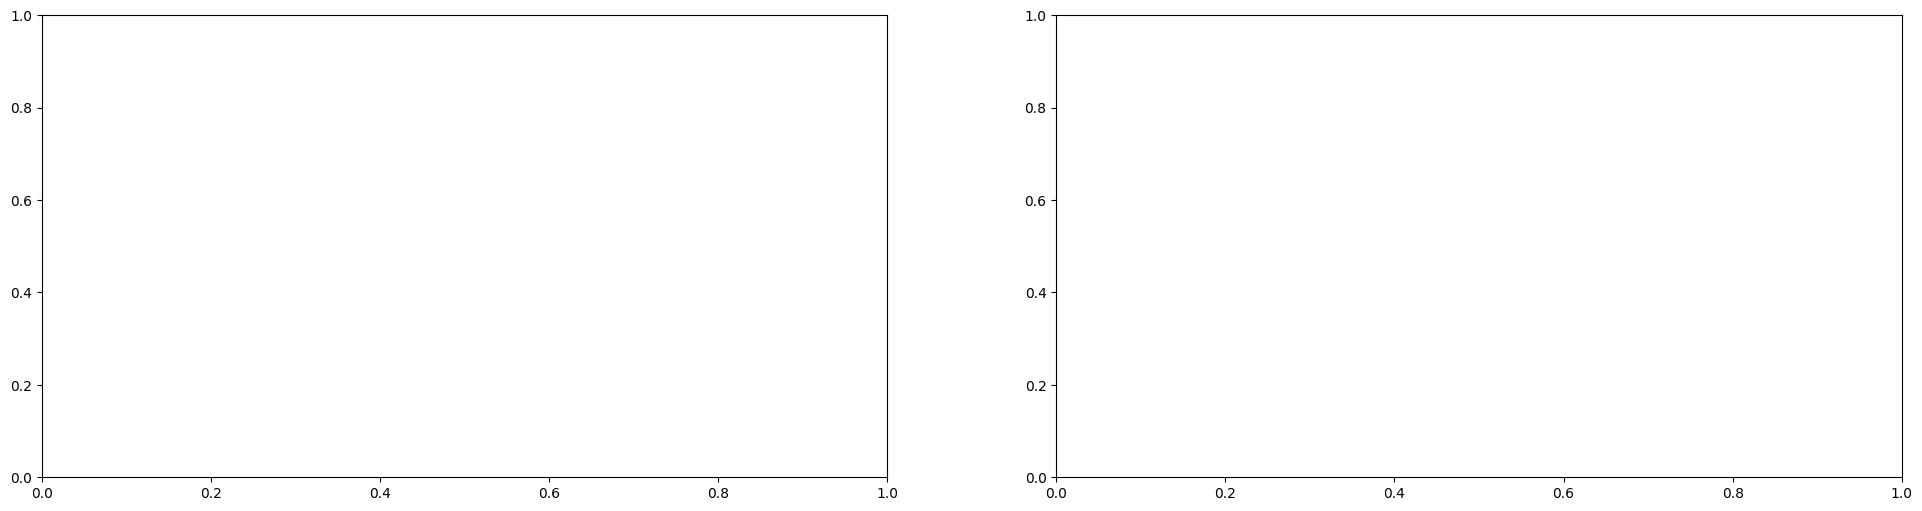

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\481051442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name_english", data=revenue_category_df.sort_values(by='payment_value', ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\481051442.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name_english", data=revenue_category_df.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])


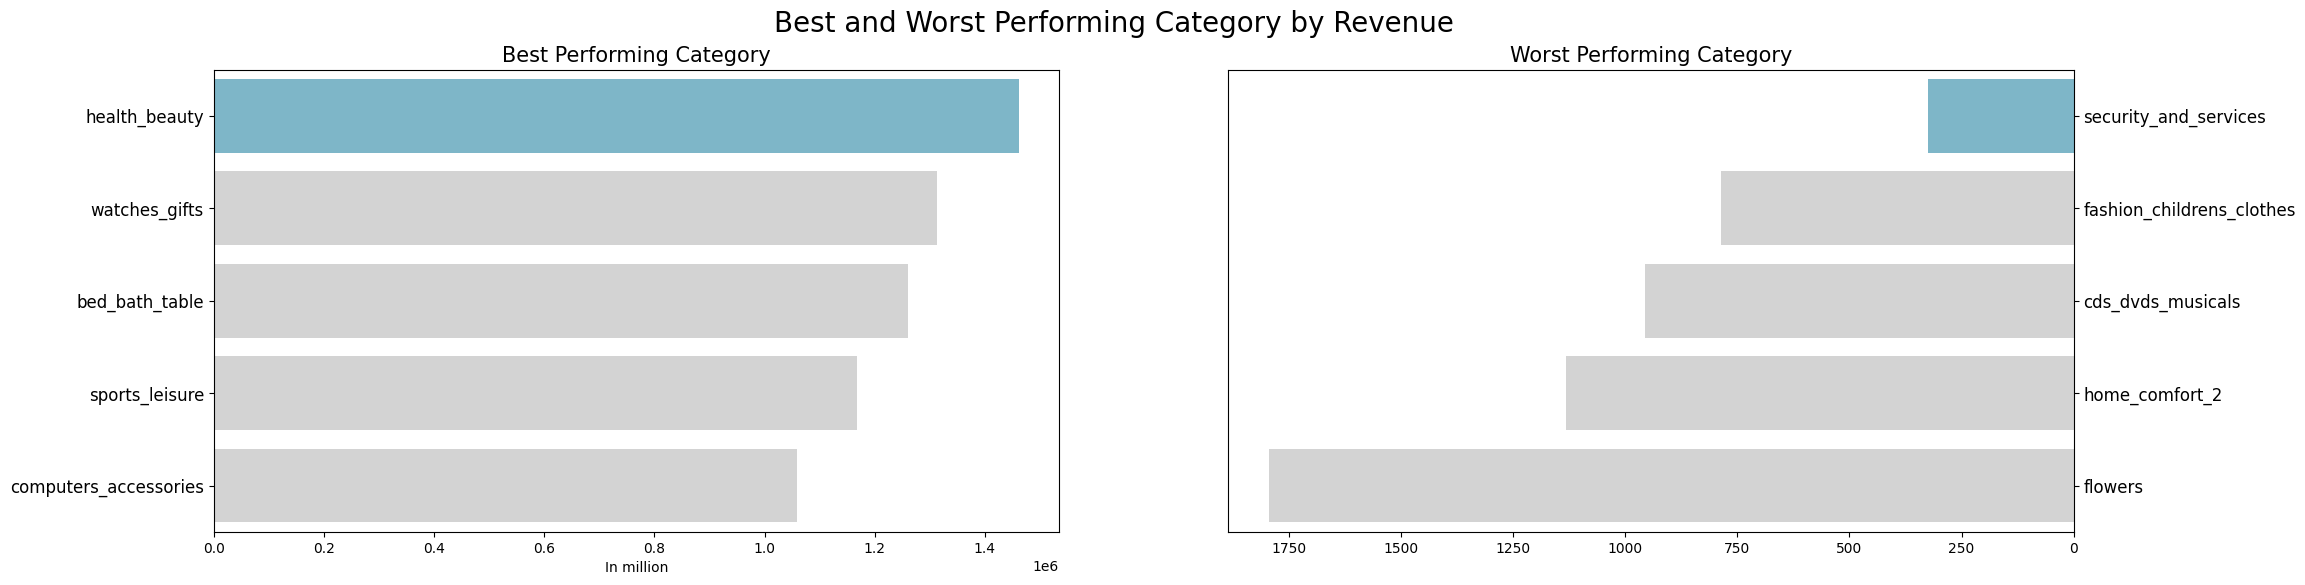

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="payment_value", y="product_category_name_english", data=revenue_category_df.sort_values(by='payment_value', ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('In million')
ax[0].set_title("Best Performing Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="payment_value", y="product_category_name_english", data=revenue_category_df.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Category by Revenue", fontsize=20)
plt.show()

### Pertanyaan 2: Berapa harga rata rata produk per kategori?

In [187]:
price_bycategory = gabungan1_df.groupby(by='product_category_name_english').price.mean().sort_values(ascending=True).reset_index()
price_bycategory.head(5)

,product_category_name_english,price
0,home_comfort_2,29.129130
1,flowers,33.204828
2,diapers_and_hygiene,46.466296
3,cds_dvds_musicals,53.333333
4,drinks,58.097833


C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\3730565997.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


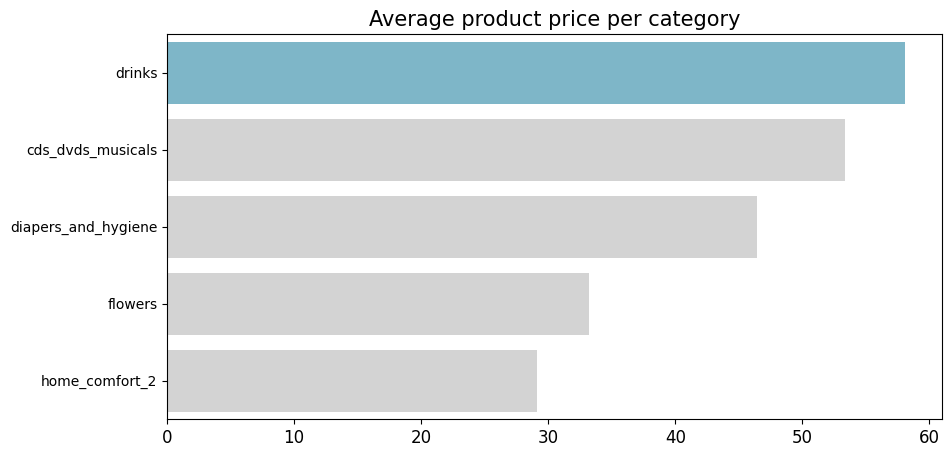

In [188]:
plt.figure(figsize=(10,5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y='product_category_name_english',
    x='price',
    data=price_bycategory.head(5).sort_values(by="price", ascending=False),
    palette=colors_
)

plt.title('Average product price per category', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana Performa Penjualan dan Revenue dalam Beberapa Bulan Terakhir?

In [189]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'payment_value':'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'payment_value': 'revenue'
}, inplace=True)
last_sixmonths = monthly_orders_df.iloc[-6:]
last_sixmonths

C:\Users\kuhpr\AppData\Local\Temp\ipykernel_25276\3750241233.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
20,2018-05,6873,1153982.15
21,2018-06,6167,1023880.50
22,2018-07,6292,1066540.75
23,2018-08,6512,1022425.32
24,2018-09,16,4439.54
25,2018-10,4,589.67


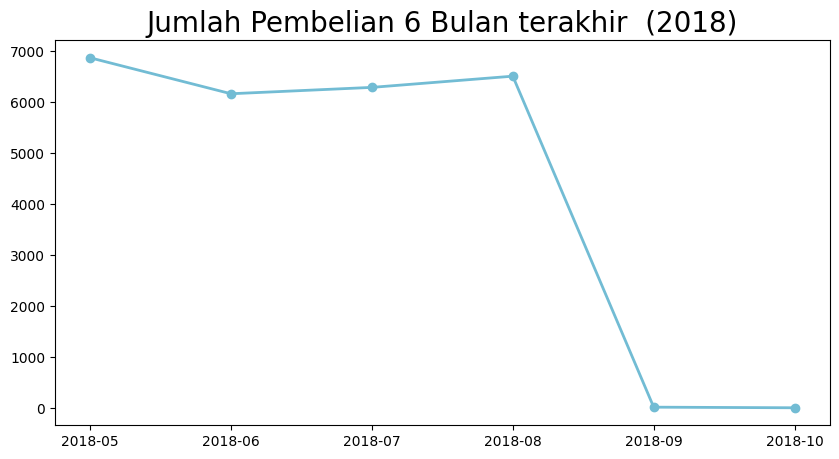

In [190]:
plt.figure(figsize=(10, 5))
plt.plot(last_sixmonths['order_purchase_timestamp'], last_sixmonths["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Pembelian 6 Bulan terakhir  (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

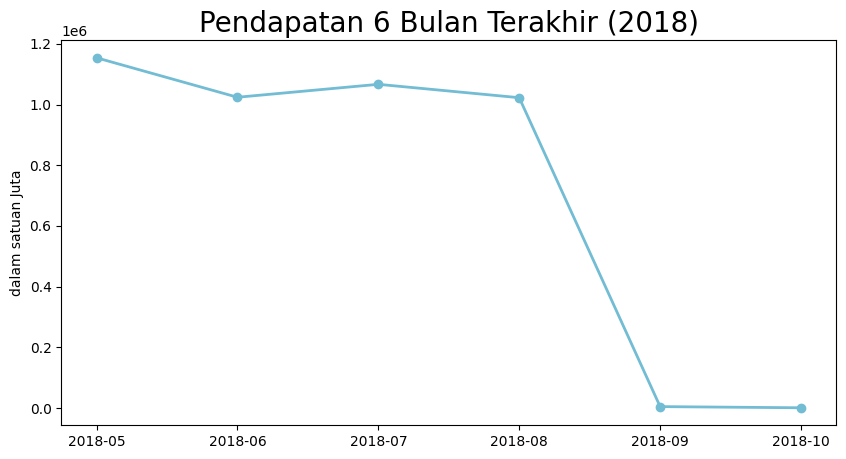

In [191]:
plt.figure(figsize=(10, 5))
plt.plot(last_sixmonths['order_purchase_timestamp'], last_sixmonths["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Pendapatan 6 Bulan Terakhir (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('dalam satuan Juta')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Kategori yang menghasilkan pendapatan tertinggi adalah health_beauty dengan total pendapatan sebesar 1.461.833,86. Rata-rata pendapatan per transaksi dalam kategori ini adalah 158,62. Namun, jika kita melihat rata-rata pendapatan per transaksi, kategori computers memiliki pendapatan transaksi tertinggi.

- Conclution pertanyaan 2: Harga rata rata produk per kategori sangat bervariasi dengan yang tertinggi adalah kategori computers harga rata rata produknya mencapai 1143.9421 dan yang terendah adalah kategori home_comfort_2 dengan harga rata rata 29.1

- Conclution pertanyaan 3: Penjualan selama enam bulan terakhir mencapai puncaknya pada bulan Mei 2018, dengan pendapatan mencapai hingga 1,2 juta. Namun, setelah itu terjadi penurunan yang signifikan dalam performa penjualan pada bulan-bulan berikutnya. Dua bulan terakhir bahkan menunjukkan penurunan performa yang sangat buruk, sehingga secara keseluruhan, performa penjualan dalam enam bulan terakhir dapat dikategorikan sebagai buruk, terutama karena fluktuasi yang drastis dari bulan ke bulan.

In [195]:
all_df.to_csv("all_df.csv", index=False)

In [194]:
gabungan1_df.to_csv("gabungan1_df.csv", index=False)